# String Selection Charts for Synthetic Polymer and Natural Gut Musical Instrument Strings
For an explanation of how to use these charts and the underlying theory see: "Choosing strings for musical instruments" by Jim Woodhouse and Nicolas Lynch-Aird.

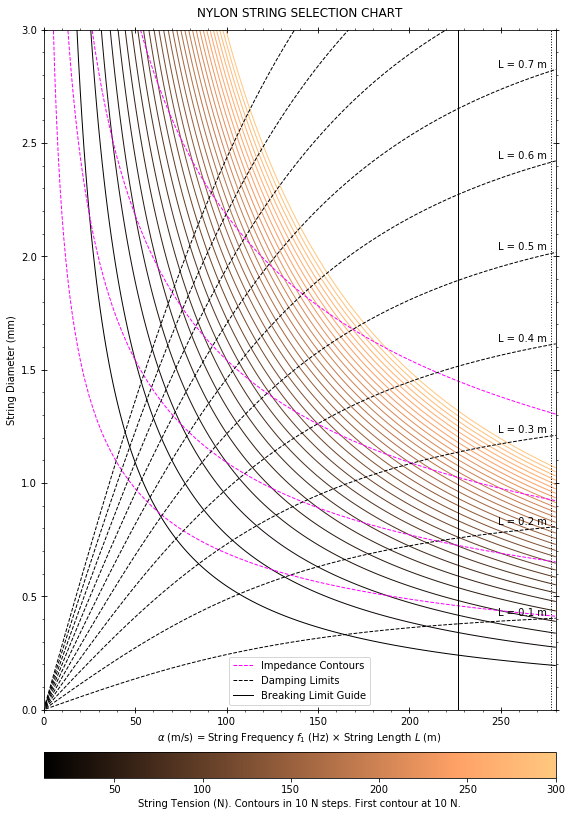

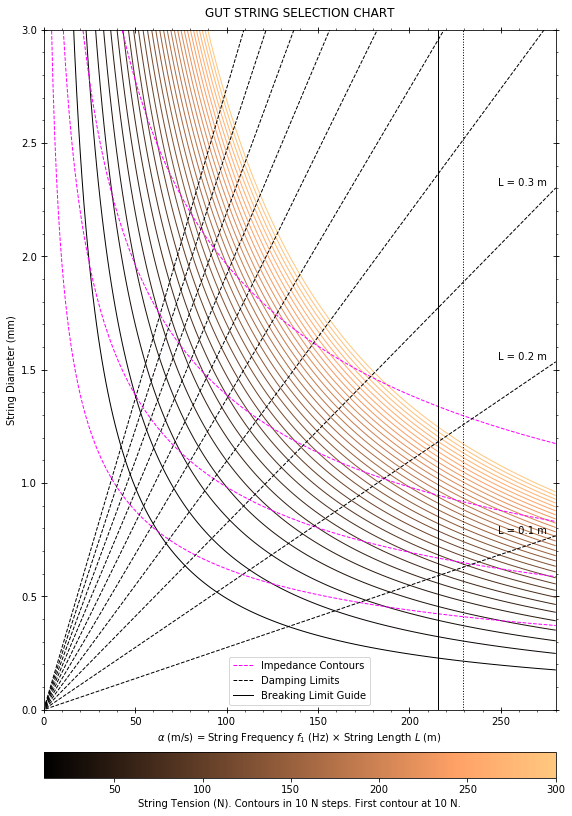

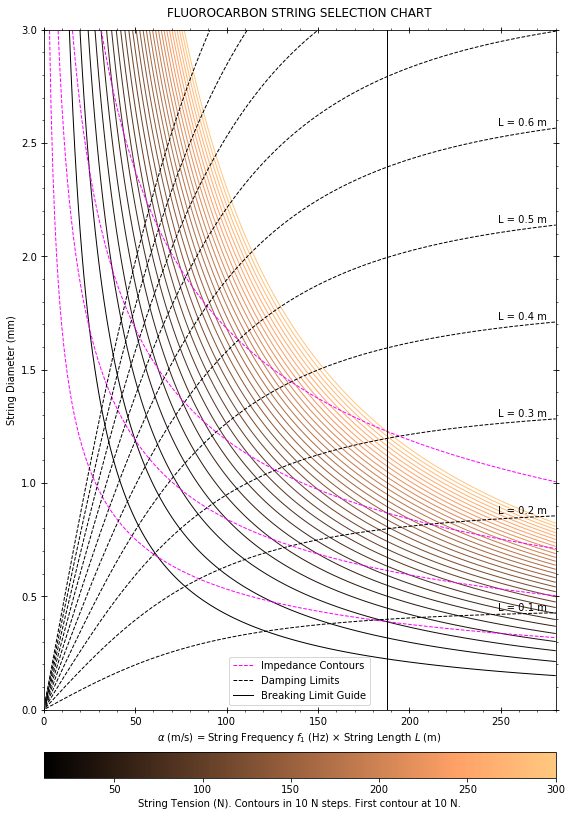

In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# enable plots to be shown in cells
%matplotlib inline

# parameter set
chart_size=(8.27,11.69)             # plot size in inches (x,y)
overtones = 10                      # number of overtones for damping constraint
lamda_threshold = 0.05              # lambda threshold value for damping constraint

def multiline(xs, ys, c, ax=None, **kwargs):
    # with thanks to Alex Williams, see: 
    # https://stackoverflow.com/questions/38208700/matplotlib-plot-lines-with-colors-through-colormap
    # find axes
    ax = plt.gca() if ax is None else ax
    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)
    # set coloring of line segments
    lc.set_array(np.asarray(c))
    # add lines to axes and rescale 
    ax.add_collection(lc)
    ax.autoscale()
    return lc

def add_damping_limit(ax, chart_x_range, length, rho, E0, E1, colour, style):
    lambda_adj = lamda_threshold / (1.0 - lamda_threshold)  ## allows form of eq.(7) to be used in place of eq.(4)
    E = E0 + (E1 * 4.0 * chart_x_range * chart_x_range * rho)  # Young's modulus in Pa
    y = 8000.0 * length * chart_x_range * np.sqrt(lambda_adj * rho / E) / (np.pi * overtones)
    ax.plot(chart_x_range, y, ls=style, color=colour, lw=1)
    if (y[-1]<2.85):
        label = "L = %s m" % (length)
        label_x = 275
        label_y = y[-1] + 0.01
        plt.text(label_x, label_y, label, horizontalalignment='right', color=colour)

def base_string_chart(chart_size, rho, E0, E1):
    fig, ax = plt.subplots(figsize=chart_size)
    chart_x_range = np.arange(1,281,1)  # alpha range for contours and damping constraints
    pi_rho = rho * np.pi
    # tension contours
    tarray = np.arange(10, 305, 10)
    n_lines = len(tarray)
    xs = np.array([chart_x_range for i in range(n_lines)])
    ys = np.array([1000.0*np.sqrt(tension/pi_rho)/chart_x_range for tension in tarray])
    lc = multiline(xs, ys, tarray, cmap='copper', lw=1)
    # impedance contours
    for Z0 in [0.08, 0.2, 0.4, 0.8]:
        y = 1000.0 * np.sqrt(2.0 * Z0 / (pi_rho * chart_x_range))
        ax.plot(chart_x_range, y, ls='--', color='magenta', lw=1)
    # damping contours
    for length in np.arange(0.1,1.1,0.1):
        add_damping_limit(ax, chart_x_range, length, rho, E0, E1, 'black', '--')
    # legend
    Z_line = mlines.Line2D([], [], ls='--', color='magenta', lw=1, label='Impedance Contours')
    D_line = mlines.Line2D([], [], ls='--', color='black', lw=1, label='Damping Limits')
    B_line = mlines.Line2D([], [], ls='-', color='black', lw=1, label='Breaking Limit Guide')
    plt.legend(handles=[Z_line, D_line, B_line], loc='lower center')
    # colourbar
    axcb = fig.colorbar(lc, orientation="horizontal", pad=0.05)
    axcb.set_label('String Tension (N). Contours in 10 N steps. First contour at 10 N.')
    # axes
    ax.axis([0, 280, 0, 3])
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%3.1f'))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(direction='inout', length=6, gridOn=False)
    ax.set_xlabel('$\\alpha$ (m/s) = String Frequency $f_1$ (Hz) $\\times$ String Length $L$ (m)')
    ax.set_ylabel("String Diameter (mm)")
    plt.subplots_adjust(top=0.95, bottom=-0.06, left=0.09, right=0.95)
    #
    return ax

# Nylon chart
# material properties
rho = 1070.0  # density, kg/m^3
E0 = 4.5e9    # E' fixed part (Pa)
E1 = 39       # E' stress part (for stress in Pa)
# draw base chart
ax1 = base_string_chart(chart_size, rho, E0, E1)
# alpha limits
ax1.plot([226.5,226.5],[0,3],'k-',lw=1)
ax1.plot([277.2,277.2],[0,3],'k:',lw=1)
# add title
ax1.set_title('NYLON STRING SELECTION CHART')
ttl=ax1.title
ttl.set_position([.5, 1.01])
# save plot to file
#plt.savefig('./nylon_string_selection_chart.eps', format='eps', dpi=1000)
#plt.savefig('./nylon_string_selection_chart.png', format='png', dpi=1000)
plt.savefig('./nylon_string_selection_chart.pdf', format='pdf', dpi=1000)
plt.show()
    
# Gut chart
# material properties
rho = 1320.0  # density, kg/m^3
E0 = 6.0e9    # E' fixed part (Pa)
E1 = 0        # E' stress part (for stress in Pa)
# draw base chart
ax1 = base_string_chart(chart_size, rho, E0, E1)
# alpha limits
ax1.plot([215.5,215.5],[0,3],'k-',lw=1)
ax1.plot([229.0,229.0],[0,3],'k:',lw=1)
# add title
ax1.set_title('GUT STRING SELECTION CHART')
ttl=ax1.title
ttl.set_position([.5, 1.01])
# save plot to file
#plt.savefig('./gut_string_selection_chart.eps', format='eps', dpi=1000)
#plt.savefig('./gut_string_selection_chart.png', format='png', dpi=1000)
plt.savefig('./gut_string_selection_chart.pdf', format='pdf', dpi=1000)
plt.show()
    
# Fluorocarbon chart
# material properties
rho = 1800.0  # density, kg/m^3
E0 = 3.2e9    # E' fixed part (Pa)
E1 = 41       # E' stress part (for stress in Pa)
# draw base chart
ax1 = base_string_chart(chart_size, rho, E0, E1)
# alpha limits
ax1.plot([187.5,187.5],[0,3],'k-',lw=1)
# add title
ax1.set_title('FLUOROCARBON STRING SELECTION CHART')
ttl=ax1.title
ttl.set_position([.5, 1.01])
# save plot to file
#plt.savefig('./carbon_string_selection_chart.eps', format='eps', dpi=1000)
#plt.savefig('./carbon_string_selection_chart.png', format='png', dpi=1000)
plt.savefig('./carbon_string_selection_chart.pdf', format='pdf', dpi=1000)
plt.show()
            
